In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Advertising.csv')

In [5]:
X=df.drop('sales',axis=1)

In [6]:
y=df['sales']

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter=PolynomialFeatures(include_bias=False)
polynomial_converter

PolynomialFeatures(include_bias=False)

In [9]:
poly_features=polynomial_converter.fit_transform(X)
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [10]:
poly_features.shape

(200, 9)

In [11]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [12]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=101)

In [15]:
X_train

array([[6.78000e+01, 3.66000e+01, 1.14000e+02, ..., 1.33956e+03,
        4.17240e+03, 1.29960e+04],
       [1.39500e+02, 2.10000e+00, 2.66000e+01, ..., 4.41000e+00,
        5.58600e+01, 7.07560e+02],
       [9.62000e+01, 1.48000e+01, 3.89000e+01, ..., 2.19040e+02,
        5.75720e+02, 1.51321e+03],
       ...,
       [2.39800e+02, 4.10000e+00, 3.69000e+01, ..., 1.68100e+01,
        1.51290e+02, 1.36161e+03],
       [2.14700e+02, 2.40000e+01, 4.00000e+00, ..., 5.76000e+02,
        9.60000e+01, 1.60000e+01],
       [1.63300e+02, 3.16000e+01, 5.29000e+01, ..., 9.98560e+02,
        1.67164e+03, 2.79841e+03]])

In [16]:
len(X_train)

160

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model=LinearRegression(fit_intercept=True)
model

LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
test_predictions=model.predict(X_test)
test_predictions

array([14.00440879, 19.36204501, 12.28218671, 16.80182928,  7.83191151,
        6.83757622, 20.15051687, 17.50965665, 10.49436303, 20.1256467 ,
        9.47764924, 14.07348185, 12.02071483, 23.39397054, 19.62506939,
        9.10813091, 12.09032912,  9.17344473,  8.34642294, 21.67784068,
        6.95781569, 19.38615567, 27.27942858, 24.55447019,  8.91737876,
       11.78402434, 20.45934235,  9.13042283, 12.7074441 ,  8.64625848,
        8.63766834, 20.18942945, 10.86503266,  6.77029889, 18.28504172,
        9.40606229, 10.27562292,  9.56621784,  7.4158912 , 10.97067111])

In [21]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
Name: sales, dtype: float64

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
MAE=mean_absolute_error(y_test,test_predictions)
MSE=mean_squared_error(y_test,test_predictions)
RMSE=np.sqrt(MSE)

In [24]:
MAE

0.4431065831480331

In [25]:
MSE

0.33749720374192205

In [26]:
RMSE

0.5809450952903571

In [27]:
df['sales'].mean()

14.022500000000003

In [28]:
model.coef_

array([ 5.28857442e-02,  1.66632005e-02,  1.44706371e-02, -1.12669173e-04,
        1.13270614e-03, -6.02100349e-05,  8.80211097e-05,  7.41831493e-05,
       -3.05994134e-05])

In [29]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

## Adjusting Parameters

Let's use a for loop to do the following:
1. Create different order polynomial X data.
2. Split that polynomial data for train/test.
3. Fit on the training data.
4. Report back the metrics on both the train and the test results.
5. Plot these results and explore overfitting

In [31]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [60]:
train_rmse_errors=[]
test_rmse_errors=[]

for d in range (1,10):
    # Create poly data set for d degree
    polynomial_converter=PolynomialFeatures(degree=d, include_bias=False)
    poly_features=polynomial_converter.fit_transform(X)
    
    # Split this new poly data set
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=313)
    
    # Train on this new poly data set
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    # Predict on both train and test
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    
    # Errors on train data set
    train_rmse_error=np.sqrt(mean_squared_error(y_train, train_pred))
    
    # Errors on test data set
    test_rmse_error=np.sqrt(mean_squared_error(y_test, test_pred))
    
    # Append errors to the lists
    train_rmse_errors.append(train_rmse_error)
    test_rmse_errors.append(test_rmse_error)

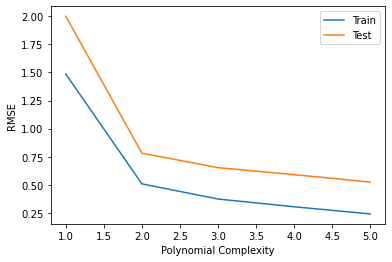

In [67]:
plt.plot(range(1,6), train_rmse_errors[:5], label="Train")
plt.plot(range(1,6), test_rmse_errors[:5], label='Test')
plt.xlabel('Polynomial Complexity')
plt.ylabel('RMSE')
plt.legend()

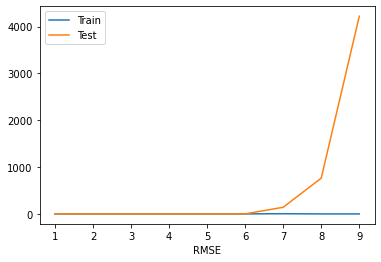

In [68]:
plt.plot(range(1,10), train_rmse_errors[:9], label="Train")
plt.plot(range(1,10), test_rmse_errors[:9], label='Test')
plt.xlabel('Polynomial Complexity')
plt.xlabel('RMSE')
plt.legend()

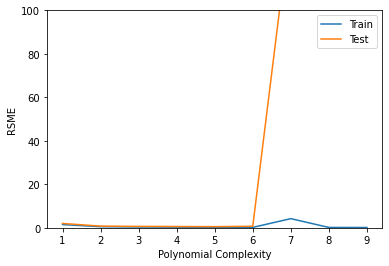

In [69]:
plt.plot(range(1,10), train_rmse_errors[:9], label="Train")
plt.plot(range(1,10), test_rmse_errors[:9], label='Test')
plt.ylim(0,100)
plt.xlabel('Polynomial Complexity')
plt.ylabel('RSME')
plt.legend()

### Finalizing model choice
1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save polynomial converter object 
4. Save  model

In [70]:
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False)

In [71]:
final_model=LinearRegression()

In [72]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

In [73]:
from joblib import dump, load

In [76]:
dump(final_poly_converter, 'my final poly converter.joblib')

['my final poly converter.joblib']

In [77]:
dump(final_model, 'my final model.joblib')

['my final model.joblib']

In [79]:
loaded_converter=load('my final poly converter.joblib')

In [80]:
loaded_model=load('my final model.joblib')

In [81]:
campaign=[[149,22,12]]

In [87]:
loaded_model.predict(loaded_converter.transform(campaign))

array([14.64501014])

In [86]:
loaded_converter.transform(campaign)

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])